<a href="https://colab.research.google.com/github/sangjin94/SQL_ITWILL/blob/main/da14_apt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* apt_201910.csv 파일을 읽고 DataFrame 생성
  * encoding 파라미터 설정
  * '가격' 컬럼에는 숫자 자릿수를 구분하는 comma가 사용되고 있음(예: 10,000)
    * '가격' 컬럼은 숫자 타입이어야 함!
* 데이터 프레임 파악
  * info, head, tail, describe, dtypes, ...
* '시군구' 컬럼의 값을 이용해서, 'province' 파생 변수(도, 광역시 이름) 만듦.
  * '강원도 강릉시 견소동' -> '강원도'
* '계약년월' 컬럼의 값을 이용해서, 'year(계약년도)', 'month(계약월)' 파생 변수 만듦.
  * 201910 -> 2019, 10
* 서울특별시 아파트들의 동별 아파트 가격의 개수, 평균, 최솟값, 최댓값
* 도/광역시별 아파트 가격 개수, 평균, 최솟값, 최댓값
* 면적이 $84 m^2$ 이상 $100 m^2$ 미만의 서울특별시 아파트들 중에서, 동별 아파트 가격 개수, 평균, 최솟값, 최댓값
* 면적이 $84 m^2$ 이상 $100 m^2$ 미만의 아파트들 중에서, 도/광역시별 아파트 가격 개수, 평균, 최솟값, 최댓값
  * 결과를 평균의 내림차순으로 정렬해서 출력
  * 결과를 최댓값의 내림차순으로 정렬해서 출력
  * 결과를 최솟값의 오름차순으로 정렬해서 출력

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# 파일이 저장된 경로
file_path='https://github.com/JakeOh/202105_itw_bd26/raw/main/datasets/apt_201910.csv'

In [8]:
#파일을 읽고 데이터프레임 생성
apt=pd.read_csv(file_path,encoding='cp949',thousands=',')
# encording='cp949': 한글 MS Window의 기본 인코딩 값
#> thousands=',': 숫자의 1000자리 구분자로 쉼표가 사용됨.

In [10]:
apt.head()
# 가격 컬럼의 값들이 출력될 때 쉼표가 사라짐.

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201910,4,10900,5,1997,경강로2539번길 8
1,강원도 강릉시 견소동,202,202,0,송정한신,116.175,201910,31,18500,10,1997,경강로2539번길 8
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,25000,6,2005,경강로2539번길 22
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,20600,3,2005,경강로2539번길 22
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,20,20500,1,2005,경강로2539번길 22


In [11]:
apt.info()
# 가격 컬럼의 데이터 타입: 정수(int64)로 바뀌었음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42758 entries, 0 to 42757
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시군구     42758 non-null  object 
 1   번지      42758 non-null  object 
 2   본번      42758 non-null  object 
 3   부번      42758 non-null  int64  
 4   단지명     42758 non-null  object 
 5   면적      42758 non-null  float64
 6   계약년월    42758 non-null  int64  
 7   계약일     42758 non-null  int64  
 8   가격      42758 non-null  int64  
 9   층       42758 non-null  int64  
 10  건축년도    42758 non-null  int64  
 11  도로명     42758 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 3.9+ MB


In [13]:
apt.tail()

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명
42753,충청북도 충주시 호암동,547-6,547,6,호반현대,59.76,201910,29,7000,3,1994,신촌2길 28
42754,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,5,12000,15,2002,원호암5길 32
42755,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,15,11000,7,2002,원호암5길 32
42756,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,17,12000,14,2002,원호암5길 32
42757,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,26,11200,11,2002,원호암5길 32


In [15]:
apt.describe() # 숫자 타입 변수의 기술 통계량

,부번,면적,계약년월,계약일,가격,층,건축년도
count,42758.000000,42758.000000,42758.0,42758.000000,42758.000000,42758.000000,42758.000000
mean,4.257051,75.990614,201910.0,14.246410,31719.163946,9.614575,2002.652252
std,35.928135,24.816118,0.0,8.678427,26001.893045,6.582509,9.716009
min,0.000000,10.020000,201910.0,1.000000,600.000000,-1.000000,1962.000000
25%,0.000000,59.820000,201910.0,7.000000,15500.000000,4.000000,1995.000000
50%,0.000000,82.536900,201910.0,14.000000,25400.000000,9.000000,2003.000000
75%,1.000000,84.961200,201910.0,21.000000,40000.000000,13.000000,2011.000000
max,2269.000000,291.336000,201910.0,31.000000,485000.000000,70.000000,2019.000000


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44201 missing from current font.
  font.set_text(s, 0, flags=flags)


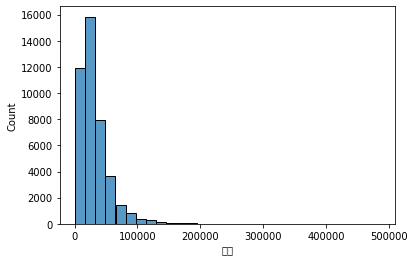

In [17]:
# 가격의 분포 시각화
sns.histplot(data=apt,x='가격',bins=30)
plt.show()
# 한글 폰트가 없어서 RuntimeWarning 이 발생함. 

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44201 missing from current font.
  font.set_text(s, 0, flags=flags)


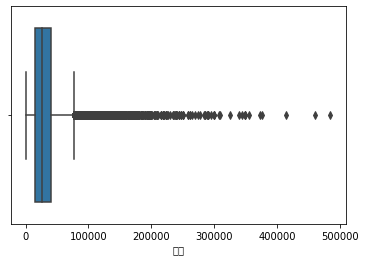

In [18]:
sns.boxplot(data=apt,x='가격')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44201 missing from current font.
  font.set_text(s, 0, flags=flags)


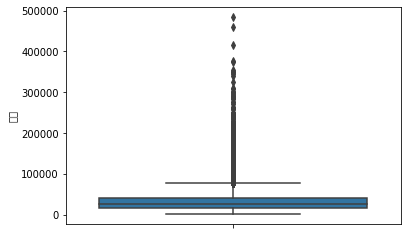

In [19]:
sns.boxplot(data=apt,y='가격')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47732 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47732 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0, flags=flags)


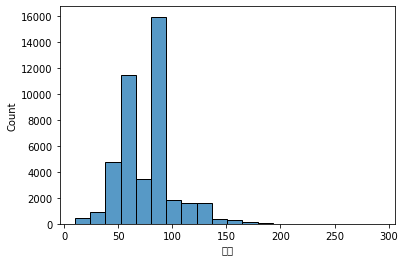

In [21]:
# 아파트 면적 분포 시각화
sns.histplot(data=apt,x='면적',bins=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47732 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47732 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0, flags=flags)


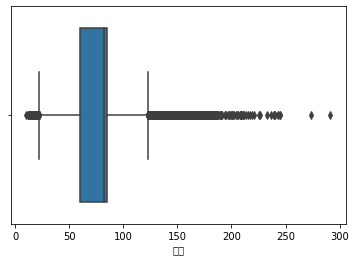

In [24]:
sns.boxplot(data=apt,x='면적')
plt.show()

파생 변수 추가

In [31]:
apt['province']=apt['시군구'].str.split().str[0]

In [33]:
apt.province.value_counts()

경기도        12126
서울특별시       4701
경상남도        2955
인천광역시       2761
부산광역시       2752
대전광역시       2487
충청남도        2045
경상북도        1985
대구광역시       1969
광주광역시       1588
충청북도        1576
울산광역시       1562
전라북도        1394
전라남도        1234
강원도         1143
세종특별자치시      315
제주특별자치도      165
Name: province, dtype: int64

In [35]:
# 시/군/구 파생변수
apt['county']=apt['시군구'].str.split().str[1]

In [36]:
apt

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,province,county
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201910,4,10900,5,1997,경강로2539번길 8,강원도,강릉시
1,강원도 강릉시 견소동,202,202,0,송정한신,116.175,201910,31,18500,10,1997,경강로2539번길 8,강원도,강릉시
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,25000,6,2005,경강로2539번길 22,강원도,강릉시
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,20600,3,2005,경강로2539번길 22,강원도,강릉시
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,20,20500,1,2005,경강로2539번길 22,강원도,강릉시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42753,충청북도 충주시 호암동,547-6,547,6,호반현대,59.760,201910,29,7000,3,1994,신촌2길 28,충청북도,충주시
42754,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.680,201910,5,12000,15,2002,원호암5길 32,충청북도,충주시
42755,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.680,201910,15,11000,7,2002,원호암5길 32,충청북도,충주시
42756,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.680,201910,17,12000,14,2002,원호암5길 32,충청북도,충주시


In [37]:
apt.county.unique()

array(['강릉시', '고성군', '동해시', '삼척시', '속초시', '양구군', '양양군', '영월군', '원주시',
       '인제군', '정선군', '철원군', '춘천시', '태백시', '평창군', '홍천군', '화천군', '횡성군',
       '가평군', '고양덕양구', '고양일산동구', '고양일산서구', '과천시', '광명시', '광주시', '구리시',
       '군포시', '김포시', '남양주시', '동두천시', '부천시', '성남분당구', '성남수정구', '성남중원구',
       '수원권선구', '수원영통구', '수원장안구', '수원팔달구', '시흥시', '안산단원구', '안산상록구', '안성시',
       '안양동안구', '안양만안구', '양주시', '양평군', '여주시', '연천군', '오산시', '용인기흥구',
       '용인수지구', '용인처인구', '의왕시', '의정부시', '이천시', '파주시', '평택시', '포천시', '하남시',
       '화성시', '거제시', '거창군', '김해시', '남해군', '밀양시', '사천시', '산청군', '양산시',
       '의령군', '진주시', '창녕군', '창원마산합포구', '창원마산회원구', '창원성산구', '창원의창구',
       '창원진해구', '통영시', '하동군', '함안군', '함양군', '합천군', '경산시', '경주시', '고령군',
       '구미시', '군위군', '김천시', '문경시', '봉화군', '상주시', '성주군', '안동시', '영덕군',
       '영주시', '영천시', '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군', '칠곡군',
       '포항남구', '포항북구', '광산구', '남구', '동구', '북구', '서구', '달서구', '달성군', '수성구',
       '중구', '대덕구', '유성구', '강서구', '금정구', '기장군', '동래구', '부산진구', '사상구',
    

In [40]:
# 계약 연도/계약 월 파생변수
apt['contr_year']= apt['계약년월']//100
apt['contr_month']= apt['계약년월']%100

In [41]:
apt

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,province,county,contr_year,contr_month
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201910,4,10900,5,1997,경강로2539번길 8,강원도,강릉시,2019,10
1,강원도 강릉시 견소동,202,202,0,송정한신,116.175,201910,31,18500,10,1997,경강로2539번길 8,강원도,강릉시,2019,10
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,25000,6,2005,경강로2539번길 22,강원도,강릉시,2019,10
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,20600,3,2005,경강로2539번길 22,강원도,강릉시,2019,10
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,20,20500,1,2005,경강로2539번길 22,강원도,강릉시,2019,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42753,충청북도 충주시 호암동,547-6,547,6,호반현대,59.760,201910,29,7000,3,1994,신촌2길 28,충청북도,충주시,2019,10
42754,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.680,201910,5,12000,15,2002,원호암5길 32,충청북도,충주시,2019,10
42755,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.680,201910,15,11000,7,2002,원호암5길 32,충청북도,충주시,2019,10
42756,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.680,201910,17,12000,14,2002,원호암5길 32,충청북도,충주시,2019,10


In [43]:
# 서울특별시 데이터
seoul_apt= apt[apt['시군구'].str.startswith('서울')]
seoul_apt

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,province,county,contr_year,contr_month
27005,서울특별시 강남구 개포동,141,141,0,개포주공 1단지,41.98,201910,1,180000,4,1982,개포로 310,서울특별시,강남구,2019,10
27006,서울특별시 강남구 개포동,141,141,0,개포주공 1단지,35.64,201910,2,153000,2,1982,개포로 310,서울특별시,강남구,2019,10
27007,서울특별시 강남구 개포동,141,141,0,개포주공 1단지,42.55,201910,3,205000,4,1982,개포로 310,서울특별시,강남구,2019,10
27008,서울특별시 강남구 개포동,141,141,0,개포주공 1단지,42.55,201910,4,207000,2,1982,개포로 310,서울특별시,강남구,2019,10
27009,서울특별시 강남구 개포동,141,141,0,개포주공 1단지,50.64,201910,12,270000,5,1982,개포로 310,서울특별시,강남구,2019,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31701,서울특별시 중랑구 중화동,42,42,0,중화동건영아파트,59.94,201910,12,27000,12,1998,동일로140길 88,서울특별시,중랑구,2019,10
31702,서울특별시 중랑구 중화동,19-16,19,16,한솔e(A동),71.34,201910,3,34000,3,2004,봉화산로27길 30,서울특별시,중랑구,2019,10
31703,서울특별시 중랑구 중화동,450,450,0,한신1차,59.76,201910,12,45500,25,1997,동일로 752,서울특별시,중랑구,2019,10
31704,서울특별시 중랑구 중화동,450,450,0,한신1차,59.76,201910,16,45700,24,1997,동일로 752,서울특별시,중랑구,2019,10


In [46]:
# 서울시 동별 (시군구 컬럼) 아파트 거래 건수, 평균 가격, 최솟값, 최댓값
result=seoul_apt.groupby('시군구')['가격'].agg(['count','mean','min','max'])
result

,count,mean,min,max
시군구,,,,
서울특별시 강남구 개포동,21,137223.809524,60700,270000
서울특별시 강남구 논현동,3,109333.333333,77000,158000
서울특별시 강남구 대치동,22,192795.454545,30000,373000
서울특별시 강남구 도곡동,23,169347.826087,31800,461000
서울특별시 강남구 삼성동,7,168714.285714,103000,290000
...,...,...,...,...
서울특별시 중랑구 면목동,38,45090.789474,21000,74300
서울특별시 중랑구 묵동,13,45619.230769,11000,73200
서울특별시 중랑구 상봉동,25,53239.200000,13000,91000


In [49]:
# 거래 건수 상위 10개 동
result.sort_values(by='count',ascending= False).iloc[:10]

,count,mean,min,max
시군구,,,,
서울특별시 노원구 상계동,198,40474.242424,23200,78000
서울특별시 구로구 구로동,120,47075.250000,9800,118000
서울특별시 노원구 중계동,108,46145.740741,16300,97000
서울특별시 금천구 시흥동,101,39634.435644,9000,86000
서울특별시 관악구 봉천동,97,56228.340206,13000,89900
서울특별시 양천구 신월동,78,41164.102564,17500,79000
서울특별시 노원구 공릉동,78,37887.179487,8500,71500
서울특별시 양천구 신정동,76,74346.710526,29950,176000
서울특별시 도봉구 창동,76,44913.815789,18700,88000


In [51]:
#  거래 평균 가격 상위 10개 서울 지역
result.sort_values(by='mean',ascending=False).head(n=10)

,count,mean,min,max
시군구,,,,
서울특별시 강남구 압구정동,10,263250.000000,170000,355000
서울특별시 서초구 반포동,17,224200.000000,87700,415000
서울특별시 서초구 잠원동,15,194313.333333,109000,295000
서울특별시 강남구 대치동,22,192795.454545,30000,373000
서울특별시 송파구 잠실동,22,191459.090909,145000,308000
서울특별시 종로구 홍파동,2,176500.000000,159000,194000
서울특별시 용산구 한강로3가,1,175000.000000,175000,175000
서울특별시 영등포구 여의도동,8,172562.500000,105000,259000
서울특별시 강남구 청담동,10,170200.000000,75000,300000


In [56]:
# 거래건수가 10건 이상인 지역에서 평균 거래가격 상위 10개 서울 지역
top10=result[result['count']>=10].sort_values(by='mean',ascending=False).head(n=10)
top10

,count,mean,min,max
시군구,,,,
서울특별시 강남구 압구정동,10,263250.000000,170000,355000
서울특별시 서초구 반포동,17,224200.000000,87700,415000
서울특별시 서초구 잠원동,15,194313.333333,109000,295000
서울특별시 강남구 대치동,22,192795.454545,30000,373000
서울특별시 송파구 잠실동,22,191459.090909,145000,308000
서울특별시 강남구 청담동,10,170200.000000,75000,300000
서울특별시 강남구 도곡동,23,169347.826087,31800,461000
서울특별시 송파구 신천동,11,154681.818182,82000,227500
서울특별시 서초구 방배동,31,142812.903226,57000,250000


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_

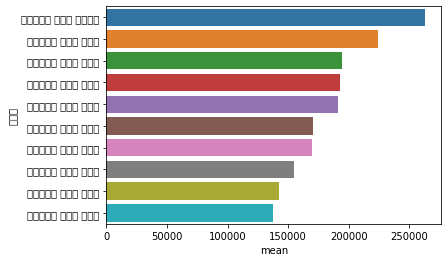

In [58]:
sns.barplot(data=top10, x='mean',y=top10.index)

In [63]:
# 서울 거래 최대 가격 상위 10개 지역 
top10=result.sort_values(by='max',ascending=False).head(n=10)
top10

,count,mean,min,max
시군구,,,,
서울특별시 용산구 한남동,6,159666.666667,27000,485000
서울특별시 강남구 도곡동,23,169347.826087,31800,461000
서울특별시 서초구 반포동,17,224200.000000,87700,415000
서울특별시 강남구 대치동,22,192795.454545,30000,373000
서울특별시 강남구 압구정동,10,263250.000000,170000,355000
서울특별시 송파구 잠실동,22,191459.090909,145000,308000
서울특별시 강남구 청담동,10,170200.000000,75000,300000
서울특별시 서초구 잠원동,15,194313.333333,109000,295000
서울특별시 강남구 삼성동,7,168714.285714,103000,290000


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_

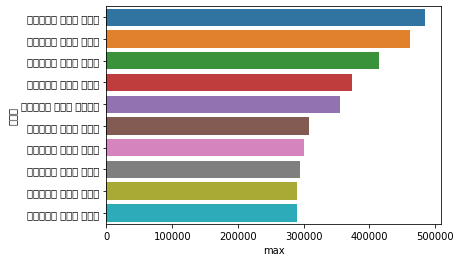

In [65]:
sns.barplot(data=top10,x='max',y=top10.index)

In [69]:
# 서울 구별 아파트 거래 건수, 가격평균, 최솟값,최댓값
result=seoul_apt.groupby('county')['가격'].agg(['count','mean','min','max'])
result

,count,mean,min,max
county,,,,
강남구,146,156752.739726,20500,461000
강동구,254,76776.259843,9000,175000
강북구,82,50530.487805,19500,88000
강서구,276,58559.420290,10200,133000
관악구,166,53410.228916,13000,89900
광진구,132,95781.060606,25500,185000
구로구,331,52736.495468,9500,136500
금천구,149,42771.664430,9000,93000
노원구,499,42058.597194,8500,97000


In [71]:
# 서울 구별 거래건수 상위 5개 지역
top5=result.sort_values(by='count',ascending=False).head(n=5)
top5

,count,mean,min,max
county,,,,
노원구,499,42058.597194,8500,97000
성북구,353,58384.390935,12900,117000
구로구,331,52736.495468,9500,136500
강서구,276,58559.420290,10200,133000
강동구,254,76776.259843,9000,175000


In [73]:
top5=top5.reset_index() # 인덱스를 컬럼으로 변환
top5

,county,count,mean,min,max
0,노원구,499,42058.597194,8500,97000
1,성북구,353,58384.390935,12900,117000
2,구로구,331,52736.495468,9500,136500
3,강서구,276,58559.420290,10200,133000
4,강동구,254,76776.259843,9000,175000


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45432 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48513 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47196 missing from current font.
  font.set_

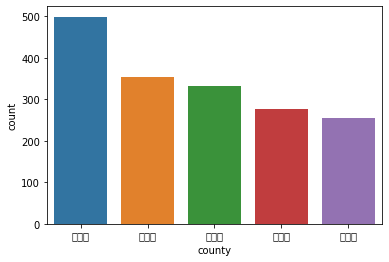

In [74]:
sns.barplot(data=top5,x='county',y='count')
plt.show()

In [78]:
# 서울 구별 거래 가격 평균 상위 5개
top5=result.sort_values(by='mean',ascending=False).head()
top5

,count,mean,min,max
county,,,,
강남구,146,156752.739726,20500,461000
서초구,121,150892.975207,22500,415000
용산구,75,114156.640000,17000,485000
송파구,226,98400.663717,16000,308000
광진구,132,95781.060606,25500,185000


In [79]:
top5=top5.reset_index()
top5

,county,count,mean,min,max
0,강남구,146,156752.739726,20500,461000
1,서초구,121,150892.975207,22500,415000
2,용산구,75,114156.640000,17000,485000
3,송파구,226,98400.663717,16000,308000
4,광진구,132,95781.060606,25500,185000


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_

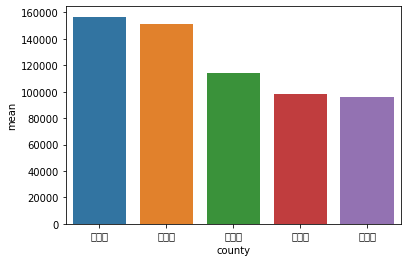

In [80]:
sns.barplot(data=top5,x='county',y='mean')

In [84]:
# 광역시도별 아파트 거래 건수, 거래가격 평균, 최소값, 최댓값
result=apt.groupby('province')['가격'].agg(['count','mean','min','max'])
result

,count,mean,min,max
province,,,,
강원도,1143,14305.559930,950,45800
경기도,12126,36447.593765,2700,262000
경상남도,2955,20157.054484,2700,83200
경상북도,1985,15304.175819,600,50000
광주광역시,1588,21786.904282,4150,115000
대구광역시,1969,28031.251397,1500,173500
대전광역시,2487,27591.418979,2400,150000
부산광역시,2752,29593.587209,1500,376640
서울특별시,4701,69302.919166,8500,485000


In [85]:
# 광역시도별 거래 건수 상위 5개 지역
result.sort_values(by='count',ascending=False).head()

,count,mean,min,max
province,,,,
경기도,12126,36447.593765,2700,262000
서울특별시,4701,69302.919166,8500,485000
경상남도,2955,20157.054484,2700,83200
인천광역시,2761,30196.960884,4000,300000
부산광역시,2752,29593.587209,1500,376640


In [86]:
# 광역시도별 아파트 거래가격 평균 상위 5개 지역
result.sort_values(by='mean',ascending=False).head()

,count,mean,min,max
province,,,,
서울특별시,4701,69302.919166,8500,485000
경기도,12126,36447.593765,2700,262000
세종특별자치시,315,33577.206349,2880,82200
인천광역시,2761,30196.960884,4000,300000
부산광역시,2752,29593.587209,1500,376640


In [88]:
# 서울 84m^2 ~ 100m^2 부분집합
seoul_subset=seoul_apt[(seoul_apt['면적']>=84)&(seoul_apt['면적']<100)]
seoul_subset

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,province,county,contr_year,contr_month
27027,서울특별시 강남구 논현동,80-13,80,13,프라임,97.8000,201910,1,93000,4,2004,도산대로30길 56,서울특별시,강남구,2019,10
27030,서울특별시 강남구 대치동,1014-3,1014,3,대치삼성,84.5800,201910,17,190000,3,2000,도곡로78길 22,서울특별시,강남구,2019,10
27033,서울특별시 강남구 대치동,988-4,988,4,대치효성,84.9100,201910,6,159000,5,1999,삼성로64길 12,서울특별시,강남구,2019,10
27037,서울특별시 강남구 대치동,1027,1027,0,래미안대치팰리스,84.9700,201910,14,277000,35,2015,삼성로51길 37,서울특별시,강남구,2019,10
27038,서울특별시 강남구 대치동,1027,1027,0,래미안대치팰리스,91.9300,201910,20,275000,23,2015,삼성로51길 35,서울특별시,강남구,2019,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31691,서울특별시 중랑구 신내동,801,801,0,영풍마드레빌,84.8485,201910,12,55500,6,2004,용마산로129가길 41,서울특별시,중랑구,2019,10
31692,서울특별시 중랑구 신내동,479,479,0,중앙하이츠,84.9700,201910,7,41000,1,1996,봉화산로56길 123,서울특별시,중랑구,2019,10
31693,서울특별시 중랑구 신내동,479,479,0,중앙하이츠,84.9700,201910,7,43000,5,1996,봉화산로56길 145-1,서울특별시,중랑구,2019,10
31694,서울특별시 중랑구 신내동,479,479,0,중앙하이츠,84.9700,201910,11,44300,9,1996,봉화산로56길 123,서울특별시,중랑구,2019,10


In [90]:
# 구별 아파트 거래 건수, 평균, 최솟값, 최댓값
result=seoul_subset.groupby('county')['가격'].agg(['count','mean','min','max'])
result

,count,mean,min,max
county,,,,
강남구,35,156277.142857,93000,277000
강동구,104,86512.692308,40000,175000
강북구,25,56340.000000,38000,87000
강서구,83,75020.481928,36900,126500
관악구,51,62277.450980,40750,80500
광진구,54,99011.111111,48000,130000
구로구,106,62302.358491,35300,124800
금천구,41,55573.170732,34300,93000
노원구,72,56870.138889,28000,90000


In [92]:
result.sort_values(by='max',ascending=False).head()

,count,mean,min,max
county,,,,
서초구,40,158377.500000,61800,340000
강남구,35,156277.142857,93000,277000
송파구,77,100422.077922,48500,195000
용산구,20,122880.000000,66000,183000
강동구,104,86512.692308,40000,175000


In [93]:
result.sort_values(by='min').head()

,count,mean,min,max
county,,,,
양천구,68,76108.088235,27500,160000
노원구,72,56870.138889,28000,90000
서대문구,59,76928.644068,28500,142000
은평구,72,63630.555556,29500,90000
도봉구,67,45629.850746,30000,74300


In [96]:
# 전국 84m^2 ~ 100m^2 부분집합
subset=apt[(apt['면적']>=84)&(apt['면적']<100)]
subset

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,province,county,contr_year,contr_month
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.9900,201910,5,25000,6,2005,경강로2539번길 22,강원도,강릉시,2019,10
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.9900,201910,12,20600,3,2005,경강로2539번길 22,강원도,강릉시,2019,10
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.9900,201910,20,20500,1,2005,경강로2539번길 22,강원도,강릉시,2019,10
5,강원도 강릉시 교동,1984,1984,0,강릉 교동 풍림아이원 아파트,84.9964,201910,5,29200,14,2017,화부산로40번길 29,강원도,강릉시,2019,10
9,강원도 강릉시 교동,1750,1750,0,교동1주공,84.8400,201910,18,21550,9,1999,가작로 78,강원도,강릉시,2019,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42752,충청북도 충주시 호암동,547-6,547,6,호반현대,84.9600,201910,26,9050,1,1994,신촌2길 29,충청북도,충주시,2019,10
42754,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.6800,201910,5,12000,15,2002,원호암5길 32,충청북도,충주시,2019,10
42755,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.6800,201910,15,11000,7,2002,원호암5길 32,충청북도,충주시,2019,10
42756,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.6800,201910,17,12000,14,2002,원호암5길 32,충청북도,충주시,2019,10


In [97]:
# 광역시도별 아파트 가격
result=subset.groupby('province')['가격'].agg(['count','mean','min','max'])
result

,count,mean,min,max
province,,,,
강원도,393,19480.854962,5200,45800
경기도,4659,39507.718395,7000,165000
경상남도,1171,24684.422716,5800,69400
경상북도,731,20489.586867,4500,47250
광주광역시,612,28226.101307,11500,70500
대구광역시,758,33837.645119,11800,91000
대전광역시,1066,30905.909944,7500,89500
부산광역시,886,36020.182844,9800,85000
서울특별시,1511,79348.775645,27500,340000


In [98]:
# 광역시도별 거래건수 상위 7개
result.sort_values(by='count',ascending=False).head(n=7)

,count,mean,min,max
province,,,,
경기도,4659,39507.718395,7000,165000
서울특별시,1511,79348.775645,27500,340000
경상남도,1171,24684.422716,5800,69400
대전광역시,1066,30905.909944,7500,89500
인천광역시,922,34813.131236,10100,85500
부산광역시,886,36020.182844,9800,85000
대구광역시,758,33837.645119,11800,91000


In [99]:
# 광역시도별 거래가격 평균 상위7개
result.sort_values(by='mean',ascending=False).head(n=7)

,count,mean,min,max
province,,,,
서울특별시,1511,79348.775645,27500,340000
경기도,4659,39507.718395,7000,165000
세종특별자치시,156,38979.487179,10000,74000
부산광역시,886,36020.182844,9800,85000
인천광역시,922,34813.131236,10100,85500
대구광역시,758,33837.645119,11800,91000
제주특별자치도,56,33226.785714,15800,75000
